In [ ]:
import pandas as pd

# Show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# If needed, also expand the width
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)  # or a large int

from copy import deepcopy
from random import randint, choice
import random

from library.solution import Solution
from library.algorithms.hc_sa.hill_climbing import hill_climbing
from library.algorithms.hc_sa.simulated_annealing import simulated_annealing
from library.wedding_solution import Wedding_Solution
from library.algorithms.hc_sa.wedding_sa_hc_solutions import Wedding_HillClimbingSolution, Wedding_SimulatedAnnealingSolution

from library.algorithms.hc_sa.neighborhoods import random_swap_neighborhood, actual_greedy_swap_neighborhood

from library.algorithms.hc_sa.run_trials_avg_fitness_per_iteration import run_trials_avg_fitness_per_iteration

# Import required function for the statistical tests
from library.statistical_tests import evaluate_statistical_significance_differece_algorithm_fitnesses

In [2]:
df = pd.read_csv("library/wedding_seat_data.csv")
df.head()

,idx,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,1,0,5000,0,0,700,700,0,0,0,0,0,0,0,0,0,900,900,900,300,300,300,0,500,300,300,300,300,500,100,100,0,0,0,0,0,0,100,1000,0,100,100,0,0,100,0,100,100,0,100,1000,0,0,0,1000,100,100,0,0,100,100,100,0,0,0
1,2,5000,0,700,700,0,0,300,300,500,500,300,300,300,300,500,0,0,0,0,0,0,0,0,0,0,0,0,0,100,100,0,100,0,100,100,100,0,0,100,100,100,0,0,0,100,100,100,0,100,0,100,100,0,100,100,100,0,100,0,0,0,0,0,0
2,3,0,700,0,2000,0,0,0,0,300,300,900,0,900,0,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,700,2000,0,0,0,900,400,300,300,0,0,0,0,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,700,700,700,400,400,400,0,300,900,400,0,400,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
# used to get the statistics for the trials
def fitness_statistics(scores):
    avg_fitness = sum(scores) / len(scores)
    print("Descriptions of the fitness: ")
    print("Average: ", int(avg_fitness))
    print("Max: \t ", max(scores))
    print("Min: \t ", min(scores))

### 1.Hill Climbing

#### 1.1 Experimenting different neighborhoods

##### Experimenting with random_swap_neighborhood

In [4]:
# Initialize random solution using the generalized SA class and the neighborhood function
solution = Wedding_HillClimbingSolution(
    neighborhood_function=random_swap_neighborhood,
    pretty_print_msg="Initial random swap solution"
)

print('Solution', solution)


neighbors = solution.get_neighbors()  # ← This now internally wraps representations into full instances

print('Neighbors:')
for neighbor in neighbors:
    print(neighbor.pretty_print())


Solution [7, 4, 8, 5, 7, 2, 6, 3, 3, 3, 5, 6, 6, 5, 8, 8, 6, 4, 4, 1, 8, 3, 4, 1, 4, 3, 6, 2, 1, 5, 7, 3, 6, 5, 8, 2, 4, 1, 2, 7, 8, 4, 4, 6, 7, 5, 5, 2, 8, 1, 6, 7, 8, 2, 1, 1, 7, 2, 7, 3, 5, 3, 2, 1]
Neighbors:
Final seating: [7, 4, 5, 5, 7, 2, 6, 3, 3, 3, 5, 6, 6, 8, 8, 8, 6, 4, 4, 1, 8, 3, 4, 1, 4, 3, 6, 2, 1, 5, 7, 3, 6, 5, 8, 2, 4, 1, 2, 7, 8, 4, 4, 6, 7, 5, 5, 2, 8, 1, 6, 7, 8, 2, 1, 1, 7, 2, 7, 3, 5, 3, 2, 1]
Fitness: 12900
Final seating: [7, 4, 8, 5, 7, 2, 6, 3, 8, 3, 5, 6, 6, 5, 8, 8, 6, 4, 4, 1, 8, 3, 4, 1, 4, 3, 6, 2, 1, 5, 7, 3, 6, 5, 8, 2, 4, 1, 2, 7, 8, 4, 4, 6, 7, 5, 5, 2, 8, 1, 6, 7, 3, 2, 1, 1, 7, 2, 7, 3, 5, 3, 2, 1]
Fitness: 9200
Final seating: [7, 4, 8, 5, 7, 2, 6, 3, 3, 3, 5, 6, 6, 5, 8, 8, 6, 4, 4, 1, 8, 3, 4, 1, 4, 3, 6, 3, 1, 5, 7, 3, 6, 5, 8, 2, 4, 1, 2, 7, 8, 4, 4, 6, 7, 5, 5, 2, 8, 1, 6, 7, 8, 2, 1, 1, 7, 2, 7, 2, 5, 3, 2, 1]
Fitness: 10000
Final seating: [7, 4, 8, 5, 7, 2, 6, 3, 3, 3, 5, 6, 6, 5, 8, 8, 6, 4, 4, 1, 8, 3, 4, 1, 4, 1, 6, 2, 1, 5, 7, 3, 6, 5, 8

##### Experimenting using actual_greedy_swap_neighborhood

In [5]:
solution = Wedding_HillClimbingSolution(
    neighborhood_function=actual_greedy_swap_neighborhood,
    pretty_print_msg="Initial random swap solution"
)

print('Solution', solution)


neighbors = solution.get_neighbors()  # ← This now internally wraps representations into full instances

print('Neighbors:')
for neighbor in neighbors:
    print(neighbor.pretty_print())

Solution [5, 8, 1, 2, 3, 7, 6, 3, 8, 1, 4, 5, 3, 8, 4, 2, 4, 5, 6, 1, 7, 8, 6, 8, 2, 1, 1, 3, 2, 6, 6, 3, 8, 2, 3, 7, 2, 4, 7, 8, 6, 7, 5, 2, 1, 8, 4, 1, 3, 6, 4, 6, 5, 5, 5, 5, 4, 7, 3, 4, 1, 7, 2, 7]
Neighbors:
Final seating: [5, 8, 1, 2, 3, 7, 6, 3, 8, 1, 4, 5, 3, 8, 4, 2, 4, 5, 7, 1, 7, 8, 6, 8, 2, 1, 1, 3, 2, 6, 6, 3, 8, 2, 3, 7, 2, 4, 7, 8, 6, 7, 5, 2, 1, 8, 4, 1, 3, 6, 4, 6, 5, 5, 5, 5, 4, 7, 3, 4, 1, 7, 2, 6]
Fitness: 11700
Final seating: [5, 8, 1, 2, 3, 7, 6, 3, 8, 1, 4, 5, 3, 8, 4, 2, 4, 5, 6, 1, 7, 8, 6, 8, 2, 1, 1, 3, 2, 6, 6, 3, 8, 7, 3, 7, 2, 4, 2, 8, 6, 7, 5, 2, 1, 8, 4, 1, 3, 6, 4, 6, 5, 5, 5, 5, 4, 7, 3, 4, 1, 7, 2, 7]
Fitness: 10900
Final seating: [5, 8, 1, 2, 3, 7, 6, 3, 8, 1, 4, 5, 3, 8, 4, 2, 4, 5, 6, 1, 8, 8, 6, 8, 2, 1, 1, 3, 2, 6, 6, 3, 8, 2, 3, 7, 2, 4, 7, 7, 6, 7, 5, 2, 1, 8, 4, 1, 3, 6, 4, 6, 5, 5, 5, 5, 4, 7, 3, 4, 1, 7, 2, 7]
Fitness: 11200
Final seating: [5, 8, 1, 2, 3, 7, 6, 3, 8, 1, 4, 5, 3, 8, 4, 2, 4, 5, 6, 1, 6, 8, 6, 8, 2, 1, 1, 3, 2, 6, 6, 3, 8, 2, 

#### 1.2 HC Single Trial with different neighborhood functions

##### Experimenting with random_swap_neighborhood

In [6]:
hc_randomswap_solution = Wedding_HillClimbingSolution(
    neighborhood_function=random_swap_neighborhood,
    pretty_print_msg="Initial random swap solution"
)

best_solution = hill_climbing(
    initial_solution=hc_randomswap_solution,
    maximization=True,
    verbose=True,
    max_iter=5
)

print('Best solution:', best_solution[0].pretty_print())


Current solution: [7, 7, 4, 7, 8, 2, 2, 4, 1, 5, 1, 2, 5, 4, 6, 1, 3, 6, 7, 3, 3, 2, 4, 3, 1, 1, 6, 3, 1, 3, 2, 4, 8, 6, 7, 5, 8, 8, 6, 1, 4, 5, 3, 8, 5, 5, 7, 2, 5, 1, 6, 6, 2, 4, 4, 7, 7, 3, 6, 8, 5, 8, 8, 2] with fitness 14900
Neighbor: [7, 7, 4, 7, 8, 2, 2, 4, 1, 5, 1, 2, 5, 4, 6, 1, 3, 6, 7, 3, 3, 2, 4, 3, 1, 1, 1, 3, 1, 3, 2, 4, 8, 6, 7, 5, 8, 8, 6, 1, 4, 5, 3, 8, 5, 5, 7, 2, 5, 6, 6, 6, 2, 4, 4, 7, 7, 3, 6, 8, 5, 8, 8, 2] with fitness 16900
Neighbor: [7, 7, 4, 7, 8, 2, 2, 4, 1, 5, 1, 2, 5, 4, 6, 1, 3, 6, 7, 3, 3, 2, 4, 3, 1, 1, 6, 7, 1, 3, 2, 4, 8, 6, 7, 5, 8, 8, 6, 1, 4, 5, 3, 8, 5, 5, 3, 2, 5, 1, 6, 6, 2, 4, 4, 7, 7, 3, 6, 8, 5, 8, 8, 2] with fitness 14700
Neighbor: [7, 7, 4, 7, 8, 2, 2, 4, 1, 5, 1, 2, 5, 4, 6, 1, 3, 6, 7, 3, 3, 2, 4, 3, 1, 1, 6, 3, 1, 3, 2, 4, 8, 6, 7, 5, 8, 8, 6, 1, 4, 5, 3, 8, 5, 5, 7, 2, 5, 1, 6, 6, 2, 4, 4, 7, 7, 3, 8, 8, 5, 6, 8, 2] with fitness 14200
Neighbor: [7, 7, 4, 7, 8, 2, 2, 4, 1, 5, 1, 2, 5, 4, 6, 1, 3, 6, 7, 3, 3, 2, 4, 3, 1, 1, 6, 3, 1, 3, 2, 

##### Experimenting using actual_greedy_swap_neighborhood

In [7]:
hc_actual_greedy_swap_neighborhood_solution = Wedding_HillClimbingSolution(
    neighborhood_function=actual_greedy_swap_neighborhood,
    pretty_print_msg="Initial random swap solution"
)

best_solution = hill_climbing(
    initial_solution=hc_actual_greedy_swap_neighborhood_solution,
    maximization=True,
    verbose=True,
    max_iter=5
)

print('Best solution:', best_solution[0].pretty_print())


Current solution: [5, 6, 2, 1, 1, 3, 3, 1, 8, 7, 2, 8, 5, 3, 8, 6, 5, 5, 7, 4, 5, 8, 4, 6, 2, 1, 3, 4, 4, 8, 7, 8, 6, 3, 3, 6, 1, 2, 1, 4, 1, 7, 6, 8, 2, 5, 3, 2, 4, 4, 3, 4, 2, 2, 6, 5, 7, 8, 7, 7, 5, 7, 6, 1] with fitness 5700
Neighbor: [7, 6, 2, 1, 1, 3, 3, 1, 8, 7, 2, 8, 5, 3, 8, 6, 5, 5, 7, 4, 5, 8, 4, 6, 2, 1, 3, 4, 4, 8, 7, 8, 6, 3, 3, 6, 1, 2, 1, 4, 1, 5, 6, 8, 2, 5, 3, 2, 4, 4, 3, 4, 2, 2, 6, 5, 7, 8, 7, 7, 5, 7, 6, 1] with fitness 3700
Neighbor: [5, 6, 2, 1, 7, 3, 3, 1, 8, 7, 2, 8, 5, 3, 8, 6, 5, 5, 7, 4, 5, 8, 4, 6, 2, 1, 3, 4, 4, 8, 7, 8, 6, 3, 3, 6, 1, 2, 1, 4, 1, 7, 6, 8, 2, 5, 3, 2, 4, 4, 3, 4, 2, 2, 6, 5, 7, 8, 7, 1, 5, 7, 6, 1] with fitness 6200
Neighbor: [5, 6, 2, 1, 1, 7, 3, 1, 8, 7, 2, 8, 5, 3, 8, 6, 5, 5, 7, 4, 5, 8, 4, 6, 2, 1, 3, 4, 4, 8, 7, 8, 6, 3, 3, 6, 1, 2, 1, 4, 1, 7, 6, 8, 2, 5, 3, 2, 4, 4, 3, 4, 2, 2, 6, 5, 3, 8, 7, 7, 5, 7, 6, 1] with fitness 6300
Neighbor: [5, 6, 2, 1, 1, 3, 3, 1, 8, 7, 2, 8, 5, 3, 8, 7, 5, 5, 7, 4, 5, 8, 4, 6, 2, 1, 3, 4, 4, 8, 7, 8, 6

In [8]:
# fitnesses = []
# for _ in range(10):
#     initial_solution = Seating_RandomSwapNeighborhood_HillClimbingSolution()
#     best_solution = hill_climbing(initial_solution, maximization=True, verbose=False)
#     fitnesses.append(best_solution.fitness())

In [9]:
# fitnesses

In [10]:
hc_fitnesses = [59500, 59000, 54400, 58900, 58800, 54100, 60600, 64900, 68100, 55900]
fitness_statistics(hc_fitnesses)

Descriptions of the fitness: 
Average:  59420
Max: 	  68100
Min: 	  54100


In [11]:
# hc_greedy_fitnesses = []
# for _ in range(10):
#     initial_solution = Seating_GreedySwapNeighborhood_HillClimbingSolution()
#     best_solution = hill_climbing(initial_solution, maximization=True, verbose=False)
#     hc_greedy_fitnesses.append(best_solution.fitness())

In [12]:
# hc_greedy_fitnesses

In [13]:
hc_greedy_fitnesses = [18000, 24500, 14600, 12100, 11300, 5900, 18900, 19000, 14700, 19300]
fitness_statistics(hc_greedy_fitnesses)

Descriptions of the fitness: 
Average:  15830
Max: 	  24500
Min: 	  5900


In [14]:
# hc_actualgreedy_fitnesses = []
# for _ in range(10):
#     initial_solution = Seating_ActualGreedySwapNeighborhood_HillClimbingSolution()
#     best_solution = hill_climbing(initial_solution, maximization=True, verbose=False)
#     hc_actualgreedy_fitnesses.append(best_solution.fitness())

In [15]:
# hc_actualgreedy_fitnesses

In [16]:
hc_actualgreedy_fitnesses = [38100, 35300, 28700, 34200, 19700, 30800, 43300, 34000, 27000, 25400]
fitness_statistics(hc_actualgreedy_fitnesses)

Descriptions of the fitness: 
Average:  31650
Max: 	  43300
Min: 	  19700


### 2. Simulated Annealing

#### 2.1 Experimenting different neighborhoods

##### Experimenting with random_swap_neighborhood

In [17]:
# import random package
import random

# Initialize random solution using the generalized SA class and the neighborhood function
solution = Wedding_SimulatedAnnealingSolution(
    neighborhood_function=random_swap_neighborhood,
    pretty_print_msg="Initial random swap SA solution"
)

print('Solution:')
print(solution.pretty_print())

# Get one random neighbor
neighbor = solution.get_random_neighbor()

print('Neighbor:')
print(neighbor.pretty_print())


Solution:
Initial random swap SA solution
Fitness: 12700
Neighbor:
Swapped person #20 at table 1 with person #64 at table 6
Fitness: 12000


##### Experimenting using actual_greedy_swap_neighborhood

In [18]:
solution = Wedding_SimulatedAnnealingSolution(
    neighborhood_function=actual_greedy_swap_neighborhood,
    pretty_print_msg="Initial random swap SA solution"
)

print('Solution:')
print(solution.pretty_print())

# Get one random neighbor
neighbor = solution.get_random_neighbor()

print('Neighbor:')
print(neighbor.pretty_print())

Solution:
Initial random swap SA solution
Fitness: 8900
Neighbor:
Swapped personC #56 at table 8 with personB #6 at table 3 for personA #23
Fitness: 12800


#### 2.2 Simulated Annealing Single Trial with different neighborhood functions

##### Experimenting with random_swap_neighborhood

In [19]:
# Initialize a generalized solution using the random swap neighborhood
sa_randomswap_solution = Wedding_SimulatedAnnealingSolution(
    neighborhood_function=random_swap_neighborhood,
    pretty_print_msg="Initial random swap SA solution"
)

# Run simulated annealing
best_solution = simulated_annealing(
    initial_solution=sa_randomswap_solution,
    maximization=True,
    verbose=True,
    max_iter=5,
    C=100.0,
    L=10,
    H=1.1
)

# Print the best solution
print('Best solution:')
print(best_solution[0].pretty_print())

Initial solution: [4, 8, 5, 2, 6, 8, 2, 5, 4, 1, 8, 6, 2, 2, 4, 5, 3, 5, 7, 1, 5, 5, 2, 5, 7, 3, 3, 3, 6, 6, 4, 8, 2, 3, 7, 2, 8, 2, 1, 6, 4, 3, 8, 6, 1, 6, 5, 1, 7, 6, 1, 7, 8, 4, 3, 1, 3, 1, 7, 7, 4, 8, 7, 4] with fitness 16300
Random neighbor [4, 8, 5, 2, 6, 8, 2, 5, 4, 1, 8, 6, 2, 3, 4, 5, 3, 5, 7, 1, 5, 5, 2, 5, 7, 3, 3, 3, 6, 6, 4, 8, 2, 3, 7, 2, 8, 2, 1, 6, 4, 3, 8, 6, 1, 6, 5, 1, 7, 6, 1, 7, 8, 4, 2, 1, 3, 1, 7, 7, 4, 8, 7, 4] with fitness: 14200
Probability of accepting worse neighbor: 7.582560427911907e-10
Neighbor is worse and was not accepted.
New current solution [4, 8, 5, 2, 6, 8, 2, 5, 4, 1, 8, 6, 2, 2, 4, 5, 3, 5, 7, 1, 5, 5, 2, 5, 7, 3, 3, 3, 6, 6, 4, 8, 2, 3, 7, 2, 8, 2, 1, 6, 4, 3, 8, 6, 1, 6, 5, 1, 7, 6, 1, 7, 8, 4, 3, 1, 3, 1, 7, 7, 4, 8, 7, 4] with fitness 16300
Random neighbor [4, 1, 5, 2, 6, 8, 2, 5, 4, 1, 8, 6, 2, 2, 4, 5, 3, 5, 7, 1, 5, 5, 2, 5, 7, 3, 3, 3, 6, 6, 4, 8, 2, 3, 7, 2, 8, 2, 1, 6, 4, 3, 8, 6, 1, 6, 5, 1, 7, 6, 8, 7, 8, 4, 3, 1, 3, 1, 7, 7, 4, 8, 7,

##### Experimenting using actual_greedy_swap_neighborhood

In [20]:
# Initialize a generalized solution using the random swap neighborhood
sa_randomswap_solution = Wedding_SimulatedAnnealingSolution(
    neighborhood_function=actual_greedy_swap_neighborhood,
    pretty_print_msg="Initial random swap SA solution"
)

# Run simulated annealing
best_solution = simulated_annealing(
    initial_solution=sa_randomswap_solution,
    maximization=True,
    verbose=True,
    max_iter=5,
    C=100.0,
    L=10,
    H=1.1
)

# Print the best solution
print('Best solution:')
print(best_solution[0].pretty_print())

Initial solution: [2, 1, 3, 8, 3, 4, 2, 3, 3, 4, 4, 8, 8, 5, 3, 6, 5, 2, 7, 1, 7, 3, 5, 8, 5, 1, 7, 7, 4, 1, 6, 8, 5, 2, 6, 6, 6, 3, 6, 8, 4, 2, 1, 7, 7, 4, 7, 5, 7, 2, 6, 3, 1, 4, 4, 1, 2, 5, 8, 8, 6, 1, 5, 2] with fitness 7600
Random neighbor [2, 1, 3, 8, 3, 4, 2, 3, 3, 4, 1, 8, 8, 5, 3, 6, 5, 2, 7, 1, 7, 3, 5, 8, 5, 1, 7, 7, 4, 1, 6, 8, 5, 2, 6, 6, 6, 3, 6, 8, 4, 2, 4, 7, 7, 4, 7, 5, 7, 2, 6, 3, 1, 4, 4, 1, 2, 5, 8, 8, 6, 1, 5, 2] with fitness: 8600
Neighbor is better. Replaced current solution by neighbor.
New current solution [2, 1, 3, 8, 3, 4, 2, 3, 3, 4, 1, 8, 8, 5, 3, 6, 5, 2, 7, 1, 7, 3, 5, 8, 5, 1, 7, 7, 4, 1, 6, 8, 5, 2, 6, 6, 6, 3, 6, 8, 4, 2, 4, 7, 7, 4, 7, 5, 7, 2, 6, 3, 1, 4, 4, 1, 2, 5, 8, 8, 6, 1, 5, 2] with fitness 8600
Random neighbor [2, 1, 3, 8, 3, 4, 2, 3, 3, 4, 1, 8, 8, 5, 3, 6, 5, 7, 7, 1, 7, 3, 5, 8, 5, 1, 7, 7, 4, 1, 6, 8, 5, 2, 6, 6, 6, 3, 6, 8, 4, 2, 4, 7, 2, 4, 7, 5, 7, 2, 6, 3, 1, 4, 4, 1, 2, 5, 8, 8, 6, 1, 5, 2] with fitness: 9100
Neighbor is better. Repl

### 3. Comparing optimization algorithms

1. Run 30 trials for:
   - HC with `random_swap`
   - HC with `actual_greedy`
   - SA with `random_swap`
   - SA with `actual_greedy`

2. For each configuration, compute:
   - `avg_fitness_per_iteration` (as you already do)
   - `final_fitness_values` (one per trial)

3. Then:
   - **Select the best-performing configuration for HC**
   - **Select the best-performing configuration for SA**
   - Compare those two **best curves** on your final plot
   - Run a statistical test on final fitness values of each best variant (e.g., HC–ActualGreedy vs SA–ActualGreedy)


#### Table 1: Common paramaters used in all setups

| Parameter             | Value             | Justification                                                 |
|-----------------------|-------------------|---------------------------------------------------------------|
| Number of trials      | 30                | Standard for statistical averaging                            |
| Number of iterations  | 100               | Enough to show convergence behavior without being too slow    |
| Optimization goal     | Maximize          | Based on your fitness function setup                          |


#### Table 2: Parameter Combinations to Try – HC + SA 

##### Hill Climbing (HC) — vary only neighborhood

| Neighborhood Function             | Label                      |
|----------------------------------|----------------------------|
| `random_swap_neighborhood`       | HC – Random Swap           |
| `actual_greedy_swap_neighborhood`| HC – Actual Greedy Swap    |


##### Simulated Annealing (SA) — parameters fixed +  vary neighborhood 

1. Defined paramater values:
- Due to time constraints and since we are only using the SA optimization algorithm as baseline model to compare with the Genetic algorithms we decided to fix the values for C, L and H.

| Parameter | Value | Justification |
|-----------|-------|---------------|
| C (float): Probability control parameter | 100 | As per Vaneshi et al the algorithm should start with high values of C since at the beginning of its execution the algorithm may be in a difficult area of the search space where going downhill with reasonably high probability can be useful to step over some hills |
| H (float): Decreasing rate of C | 1.01 | As per Vaneshi et al, we start with high value of C to step ober some hills and avoid geting stuck in local optima but we then want the value of C to be decreased across iterations as the algorithm hoepfully becomes closer to the global optima hill as per the basis of atraction. hence at this point we want the algorithm to have a lower porbability of acceptign worse solutions and behaving similarly to HC<br><br>We chose 1.01 as Vaneshi et al mentions that "c could be divided by a constant that is “slightly” larger than 1." |
| L (int): Number of iterations with same C | 30 | In Vaneshi et al it's mentioned that "in order to maximize our chances of finding a global optimum, all we can do is execute a large number of transitions for each value of the control parameter, and decrease the control parameter slowly, in such a way that the total number of itera- tions performed is as large as possible."<br><br>Considering our computational limitations we defined L = 30 to still allow |


2. Define the combinations going to be experiemnted with

| Algorithm | Neighborhood Function               | Label                   | Notes                                |
|-----------|-------------------------------------|-------------------------|--------------------------------------|
| SA        | `random_swap_neighborhood`          | SA - Random Swap        | Uses fixed C, L, H (from Vaneshi et al) |
| SA        | `actual_greedy_swap_neighborhood`   | SA - Actual Greedy      | Uses fixed C, L, H (from Vaneshi et al)                                    |



#### 3.1 Obtaining best configuration for HC

##### 3.1.1 HC - Random Swap 

Trial 1/30
Number of iterations:  23
Trial 2/30
Number of iterations:  30
Trial 3/30
Number of iterations:  33
Trial 4/30
Number of iterations:  25
Trial 5/30
Number of iterations:  25
Trial 6/30
Number of iterations:  22
Trial 7/30
Number of iterations:  27
Trial 8/30
Number of iterations:  23
Trial 9/30
Number of iterations:  26
Trial 10/30
Number of iterations:  15
Trial 11/30
Number of iterations:  29
Trial 12/30
Number of iterations:  17
Trial 13/30
Number of iterations:  29
Trial 14/30
Number of iterations:  31
Trial 15/30
Number of iterations:  25
Trial 16/30
Number of iterations:  26
Trial 17/30
Number of iterations:  28
Trial 18/30
Number of iterations:  36
Trial 19/30
Number of iterations:  29
Trial 20/30
Number of iterations:  28
Trial 21/30
Number of iterations:  34
Trial 22/30
Number of iterations:  32
Trial 23/30
Number of iterations:  23
Trial 24/30
Number of iterations:  23
Trial 25/30
Number of iterations:  21
Trial 26/30
Number of iterations:  16
Trial 27/30
Number of

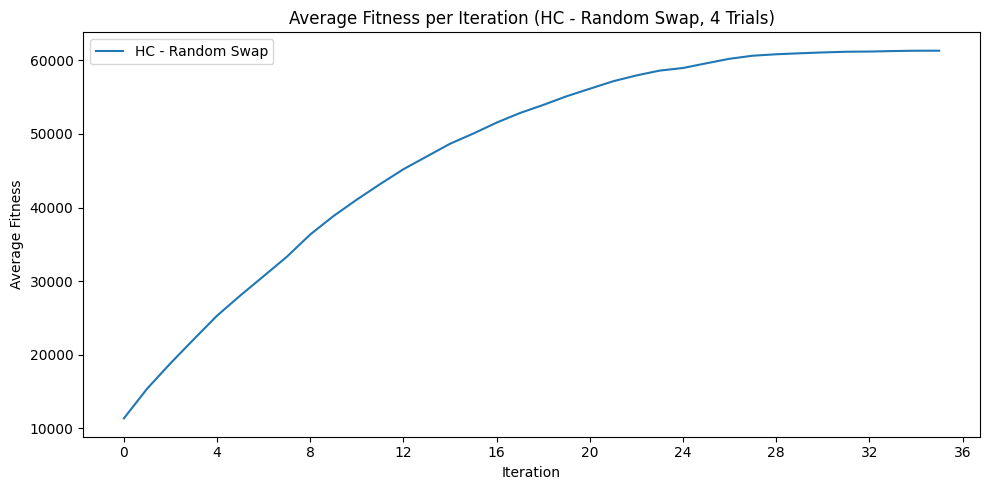

In [21]:
hc_rs_best_solutions, hc_rs_all_fitness_histories, hc_rs_avg_fitness_per_iter = run_trials_avg_fitness_per_iteration(
    optimization_algo="HC",
    neighborhood_function=random_swap_neighborhood,
    trials=30,
    max_iter=100,
    verbose=False,

)

In [29]:
# Best solution obtained from hill climbing with random swap neighborhood
hc_rs_best_solutions_fitnesses = [solution.fitness() for solution in hc_rs_best_solutions]
hc_rs_best_solution = max(hc_rs_best_solutions_fitnesses)
print("Best solution from hill climbing with random swap neighborhood :", hc_rs_best_solution)

Best solution from hill climbing with random swap neighborhood : 72500


##### 3.1.2 HC - Actual Greedy Swap 

Trial 1/30
Number of iterations:  15
Trial 2/30
Number of iterations:  9
Trial 3/30
Number of iterations:  10
Trial 4/30
Number of iterations:  11
Trial 5/30
Number of iterations:  11
Trial 6/30
Number of iterations:  8
Trial 7/30
Number of iterations:  9
Trial 8/30
Number of iterations:  6
Trial 9/30
Number of iterations:  25
Trial 10/30
Number of iterations:  10
Trial 11/30
Number of iterations:  11
Trial 12/30
Number of iterations:  10
Trial 13/30
Number of iterations:  5
Trial 14/30
Number of iterations:  9
Trial 15/30
Number of iterations:  13
Trial 16/30
Number of iterations:  7
Trial 17/30
Number of iterations:  11
Trial 18/30
Number of iterations:  8
Trial 19/30
Number of iterations:  8
Trial 20/30
Number of iterations:  5
Trial 21/30
Number of iterations:  4
Trial 22/30
Number of iterations:  10
Trial 23/30
Number of iterations:  14
Trial 24/30
Number of iterations:  18
Trial 25/30
Number of iterations:  16
Trial 26/30
Number of iterations:  4
Trial 27/30
Number of iterations:

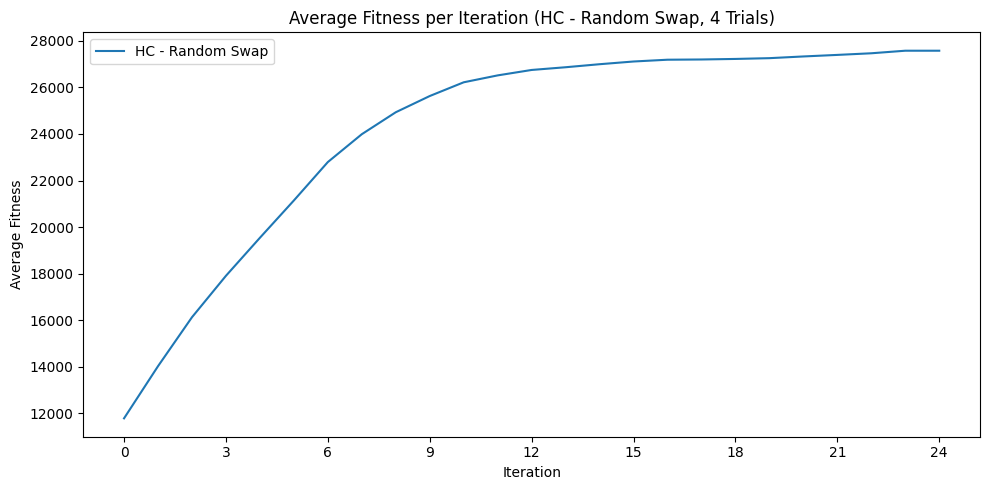

In [30]:
hc_ags_best_solutions, hc_ags_all_fitness_histories, hc_ags_avg_fitness_per_iter = run_trials_avg_fitness_per_iteration(
    optimization_algo="HC",
    neighborhood_function=actual_greedy_swap_neighborhood,
    trials=30,
    max_iter=100,
    verbose=False,

)

In [31]:
# Best solution obtained from hill climbing with actual greedy swap neighborhood
hc_ags_best_solutions_fitnesses = [solution.fitness() for solution in hc_ags_best_solutions]
hc_ags_best_solution = max(hc_ags_best_solutions_fitnesses)
print("Best solution from hill climbing with actual greedy swap neighborhood:", hc_ags_best_solution)

Best solution from hill climbing with actual greedy swap neighborhood: 49100


##### 3.1.3 Comparison between Random Swap and Actual Greedy Swap 

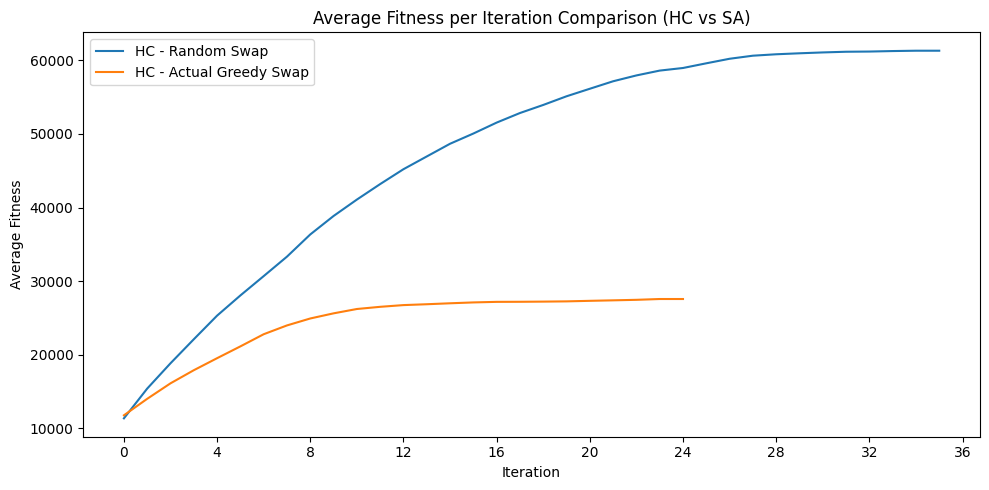

In [32]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Plot side-by-side fitness comparison
plt.figure(figsize=(10, 5))

plt.plot(hc_rs_avg_fitness_per_iter, label='HC - Random Swap')
plt.plot(hc_ags_avg_fitness_per_iter, label='HC - Actual Greedy Swap')

plt.xlabel('Iteration')
plt.ylabel('Average Fitness')
plt.title('Average Fitness per Iteration Comparison (HC vs SA)')
plt.legend()

# Remove background grid and force integer x-axis ticks
plt.grid(False)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


> For HC, the average fitness per iteration is higher for the random swap neighborhood than for the actual greedy swap neighborhood. This indicates that the random swap neighborhood is more effective in exploring the solution space and finding better solutions compared to the actual greedy swap neighborhood.
>
> We will select the random swap neighborhood as the best configuration for the HC algorithm.

#### 3.2 Obtaining best configuration for SA

##### 3.2.1 SA - Random Swap 

Trial 1/30
Number of iterations:  101
Trial 2/30
Number of iterations:  101
Trial 3/30
Number of iterations:  101
Trial 4/30
Number of iterations:  101
Trial 5/30
Number of iterations:  101
Trial 6/30
Number of iterations:  101
Trial 7/30
Number of iterations:  101
Trial 8/30
Number of iterations:  101
Trial 9/30
Number of iterations:  101
Trial 10/30
Number of iterations:  101
Trial 11/30
Number of iterations:  101
Trial 12/30
Number of iterations:  101
Trial 13/30
Number of iterations:  101
Trial 14/30
Number of iterations:  101
Trial 15/30
Number of iterations:  101
Trial 16/30
Number of iterations:  101
Trial 17/30
Number of iterations:  101
Trial 18/30
Number of iterations:  101
Trial 19/30
Number of iterations:  101
Trial 20/30
Number of iterations:  101
Trial 21/30
Number of iterations:  101
Trial 22/30
Number of iterations:  101
Trial 23/30
Number of iterations:  101
Trial 24/30
Number of iterations:  101
Trial 25/30
Number of iterations:  101
Trial 26/30
Number of iterations: 

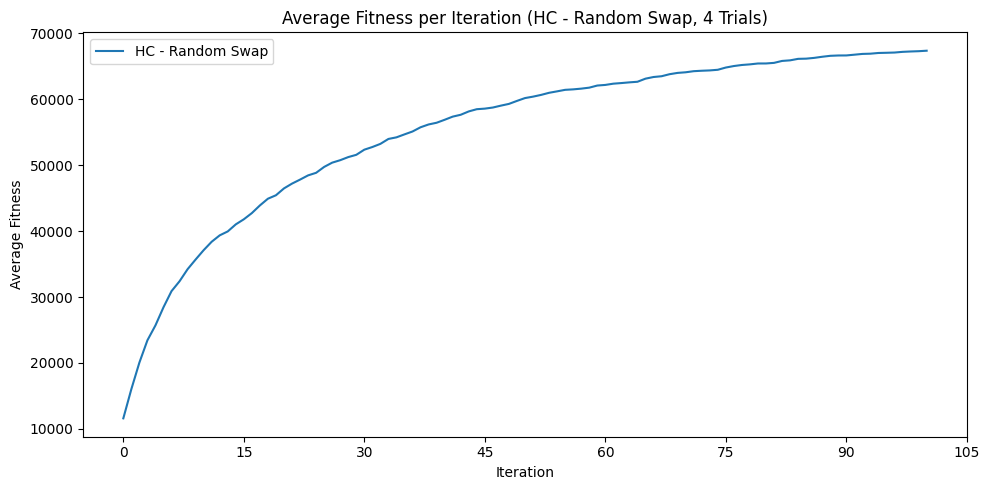

In [33]:
sa_rs_best_solutions, sa_rs_all_fitness_histories, sa_rs_avg_fitness_per_iter = run_trials_avg_fitness_per_iteration(
    optimization_algo="SA",
    neighborhood_function=random_swap_neighborhood,
    trials=30,
    max_iter=100,
    verbose=False,

)

In [34]:
# Best solution obtained from simulated annealing with random swap neighborhood
sa_rs_best_solutions_fitnesses = [solution.fitness() for solution in sa_rs_best_solutions]
sa_rs_best_solution = max(sa_rs_best_solutions_fitnesses)
print("Best solution from simulated annealing with random swap neighborhood :", sa_rs_best_solution)

Best solution from simulated annealing with random swap neighborhood : 73900


##### 3.2.2 SA - Actual Greedy Swap 

Trial 1/30
Number of iterations:  101
Trial 2/30
Number of iterations:  101
Trial 3/30
Number of iterations:  101
Trial 4/30
Number of iterations:  101
Trial 5/30
Number of iterations:  101
Trial 6/30
Number of iterations:  101
Trial 7/30
Number of iterations:  101
Trial 8/30
Number of iterations:  101
Trial 9/30
Number of iterations:  101
Trial 10/30
Number of iterations:  101
Trial 11/30
Number of iterations:  101
Trial 12/30
Number of iterations:  101
Trial 13/30
Number of iterations:  101
Trial 14/30
Number of iterations:  101
Trial 15/30
Number of iterations:  101
Trial 16/30
Number of iterations:  101
Trial 17/30
Number of iterations:  101
Trial 18/30
Number of iterations:  101
Trial 19/30
Number of iterations:  101
Trial 20/30
Number of iterations:  101
Trial 21/30
Number of iterations:  101
Trial 22/30
Number of iterations:  101
Trial 23/30
Number of iterations:  101
Trial 24/30
Number of iterations:  101
Trial 25/30
Number of iterations:  101
Trial 26/30
Number of iterations: 

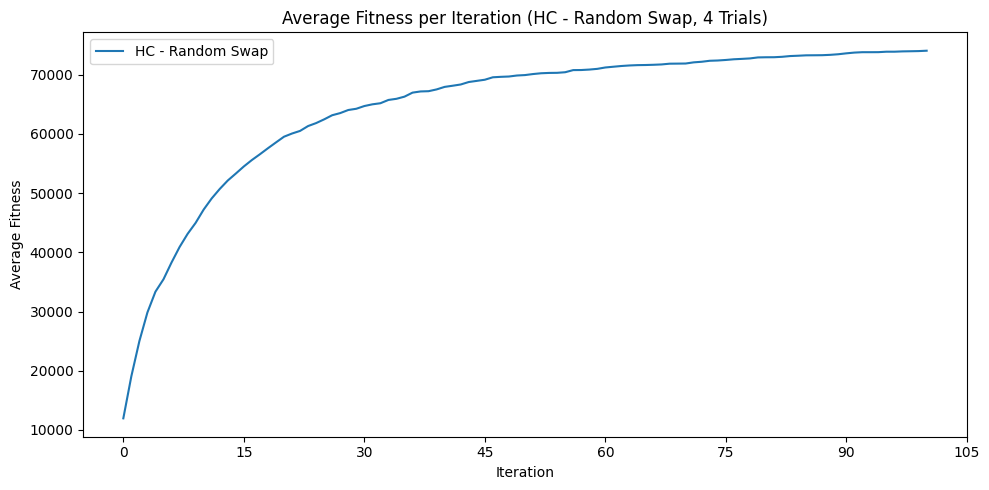

In [35]:
sa_ags_best_solutions, sa_ags_all_fitness_histories, sa_ags_avg_fitness_per_iter = run_trials_avg_fitness_per_iteration(
    optimization_algo="SA",
    neighborhood_function=actual_greedy_swap_neighborhood,
    trials=30,
    max_iter=100,
    verbose=False,

)

In [36]:
# Best solution obtained from simulated annealing with actual greedy swap neighborhood
sa_ags_best_solutions_fitnesses = [solution.fitness() for solution in sa_ags_best_solutions]
sa_ags_best_solution = max(sa_ags_best_solutions_fitnesses)
print("Best solution from simulated annealing with actual greedy swap neighborhood:", sa_ags_best_solution)

Best solution from simulated annealing with actual greedy swap neighborhood: 80600


##### 3.2.3 Comparison between Random Swap and Actual Greedy Swap 

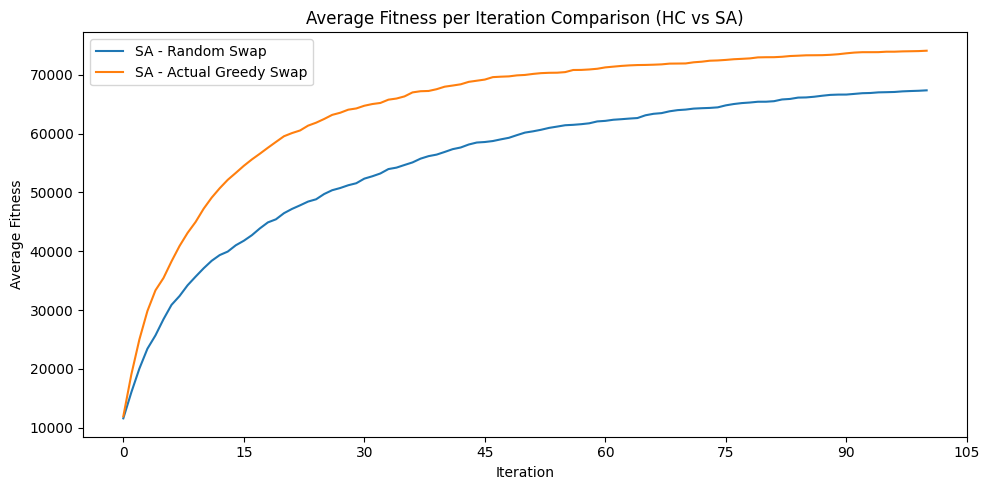

In [38]:
# Plot side-by-side fitness comparison
plt.figure(figsize=(10, 5))

plt.plot(sa_rs_avg_fitness_per_iter, label='SA - Random Swap')
plt.plot(sa_ags_avg_fitness_per_iter, label='SA - Actual Greedy Swap')

plt.xlabel('Iteration')
plt.ylabel('Average Fitness')
plt.title('Average Fitness per Iteration Comparison (HC vs SA)')
plt.legend()

# Remove background grid and force integer x-axis ticks
plt.grid(False)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


> For SA, actual_greedy_swap_neighborhood yields the best avg results
>
> We will use this as the final solution for SA

#### 3.3 Evaluating the Top Configurations of HC and SA

##### 3.3.1 Ploting the top configurations of the SA and HC algorithms

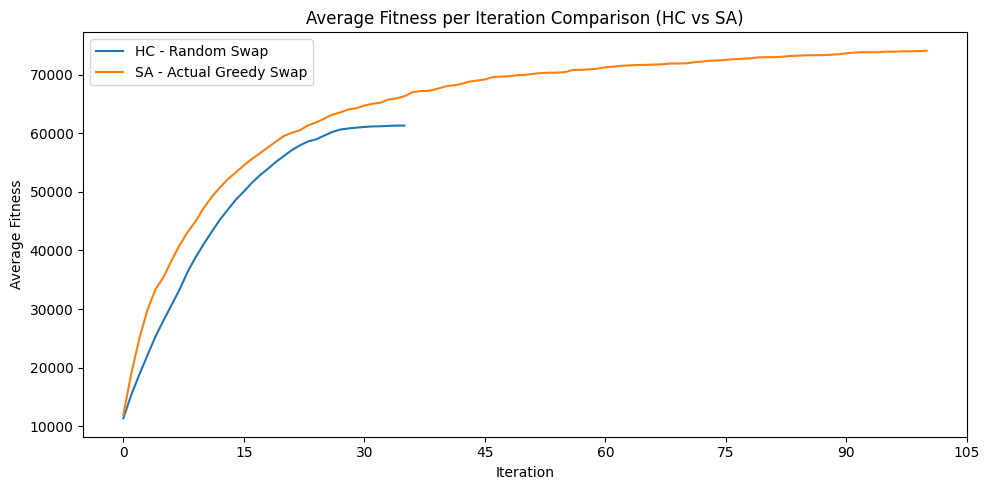

In [39]:
# Plot side-by-side fitness comparison
plt.figure(figsize=(10, 5))

# Make changes here
plt.plot(hc_rs_avg_fitness_per_iter, label='HC - Random Swap')
plt.plot(sa_ags_avg_fitness_per_iter, label='SA - Actual Greedy Swap')

plt.xlabel('Iteration')
plt.ylabel('Average Fitness')
plt.title('Average Fitness per Iteration Comparison (HC vs SA)')
plt.legend()

# Remove background grid and force integer x-axis ticks
plt.grid(False)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


##### 3.3.2 Evaluate observed performance difference between best configurations is statistically significant


> **Note – Statistical Significance Evaluation**
>
> According to `Venachi et al.`, when comparing the performance of different optimization configurations (e.g., different variants of Genetic Algorithms, Hill Climbing, or Simulated Annealing), it is important to assess whether the observed differences are **statistically significant**.
>
> While it is possible to run statistical tests at each generation (i.e., per-iteration analysis), this is rarely done in practice due to complexity and the risk of multiple comparisons. Instead, it is typical and sufficient to evaluate significance **only at termination**, by comparing the **final fitness values** obtained across multiple independent runs.
>
> The recommended procedure is as follows:
>
> 1. **Run multiple trials** (e.g., 30) for each configuration being compared.
> 2. **Extract the final fitness value** from each trial (usually the best fitness in the last generation or iteration).
> 3. **Check for normality** in the fitness distributions using the `Kolmogorov–Smirnov test`.
> 4. Based on the normality result:
>    - If both samples are normally distributed, apply a `Student’s t-test`.
>    - If at least one sample is not normal, use a **non-parametric test**, such as the `Mann–Whitney U test` (the one we will use), **Wilcoxon rank-sum**, or **Kruskal–Wallis**.
> 5. **Interpret the p-value**:
>    - If **p < 0.05**, the difference is statistically significant.
>    - Otherwise, we conclude that the difference may be due to chance.
>
> This approach ensures that the evaluation of algorithm performance is both statistically valid and aligned with established scientific practice.


`One-Sample Kolmogorov–Smirnov (K–S) Test for Normality`

1. Null Hypothesis (H₀):
The data follow a **standard normal distribution** (i.e., mean = 0, standard deviation = 1).

2. Alternative Hypothesis (H₁):
The data do **not** follow a standard normal distribution.

3. Test Statistic:
The Kolmogorov–Smirnov test statistic **D** is defined as:

$$
D = \max_{1 \leq i \leq N} \left( F(Y_i) - \frac{i - 1}{N}, \frac{i}{N} - F(Y_i) \right)
$$

where \( F \) is the cumulative distribution function (CDF) of the **standard normal distribution**.

4. Assumptions:
- The distribution being tested (standard normal) is **fully specified**, i.e., with fixed parameters (μ = 0, σ = 1).
- The data must be **continuous**.
- The test is sensitive to differences in both **location** and **shape**.

5. Notes:
- To satisfy the assumption of a fully specified distribution, we had to **standardize our data first**


`Two-Sample t-Test`
1. **Null Hypothesis (H₀):** μ₁ = μ₂  
2. **Alternative Hypothesis (H₁):** μ₁ ≠ μ₂ (or one-sided if specified)

3. **Test Statistic:**

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

**where:**

- \( \bar{x}_i \): sample mean of group *i*  
- \( s_i^2 \): sample variance of group *i*  
- \( n_i \): sample size of group *i*

4. **Assumming unequal variances**

- We are avoiding a separate test for equality of variances (like Levene’s or F-test) because these tests add complexity, can be sensitive to non-normality, and may lead to incorrect decisions due to their own sampling variability. Instead, we use Welch’s t-test, which is robust to unequal variances and performs well even when variances are equal—eliminating the need for a preliminary variance check and simplifying the analysis without sacrificing validity.


`Mann–Whitney U test`


1. **Hypotheses**
- **Null hypothesis (H₀):**  
  The distributions of the two groups are identical (no systematic difference in values).
  
- **Alternative hypothesis (H₁):**  
  One group tends to have larger (or smaller) values than the other.

2. **Test Statistic (U)**
- The U statistic is computed based on the **ranks** of all values combined.
- Each observation is assigned a rank across both samples.
- U measures how much the ranks of one group differ from the other.

For two samples of sizes \( n_1 \) and \( n_2 \), the U statistic for group 1 is:
$$
U_1 = n_1 n_2 + \frac{n_1 (n_1 + 1)}{2} - R_1
$$
Where:
- \( R_1 \) is the sum of ranks for group 1.

The test returns the smaller of \( U_1 \) and \( U_2 \) as the final statistic.

3. **Assumptions**
- Observations are **independent** between and within groups.
- The dependent variable is **ordinal**, **interval**, or **ratio** scale.
- The test **does not assume normality**.
- The distributions of the two groups should have **similar shapes** for a true test of medians.

4. **Notes**
- Ideal when data is **non-normal**, **skewed**, or when sample sizes are small.
- Commonly used to compare the **performance of two algorithms** across repeated runs.





In [40]:
evaluate_statistical_significance_differece_algorithm_fitnesses(
    hc_rs_best_solutions_fitnesses,
    sa_ags_best_solutions_fitnesses,
    label_1="HC - Random Swap",
    label_2="SA - ActualGreedy"
)


Normality Check (Kolmogorov–Smirnov Test):
  HC - Random Swap: p = 0.72284 → Normal
  SA - ActualGreedy: p = 0.62871 → Normal

Student's t-test between HC - Random Swap and SA - ActualGreedy:
  Test Statistic = -9.7331
  p-value        = 0.00000
  ➤ Result: Statistically significant difference (p < 0.05)


{'test_used': "Student's t-test",
 'statistic': -9.73314249220821,
 'p_value': 8.375524358508225e-14,
 'significant': True}